In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

# Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [3]:
ads_data = pd.read_csv('ads_data.csv.zip', compression='zip')

In [5]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [6]:
ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s')

In [7]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [8]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [ ]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?


<AxesSubplot:xlabel='date'>

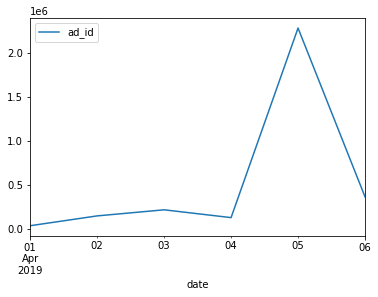

In [9]:
ads_data.groupby('date') \
    .agg({'ad_id': 'count'}).plot()

In [102]:
ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index='date', columns='event', values='ad_id').reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [10]:
#Число уникальных объявлений по дням
ads_data.groupby(['date'], as_index=False) \
    .agg({'ad_id': 'nunique'})

,date,ad_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,179
3,2019-04-04,150
4,2019-04-05,131
5,2019-04-06,61


In [11]:
#Число уникальных кампаний по дням
ads_data.groupby(['date'], as_index=False) \
    .agg({'campaign_union_id': 'nunique'})

,date,campaign_union_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,177
3,2019-04-04,147
4,2019-04-05,130
5,2019-04-06,60


In [13]:
ads_data[ads_data.date == '2019-04-05'] \
    .groupby('ad_id') \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False) \
    .head()

,time
ad_id,
112583,2166611
29927,27186
44635,8268
46583,7327
44956,5656


In [14]:
ad_id = 112583

In [15]:
ads_data.query('ad_id == @ad_id').head(1)


,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


In [72]:
# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. 
# Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
# Различается ли средний и медианный CTR объявлений в наших данных?

In [17]:
ads_data_by_ad = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()

In [18]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view, 
                           ctr_per = 100 * ads_data_by_ad.click / ads_data_by_ad.view)

In [19]:
ads_data_by_ad.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [20]:
ads_data_by_ad.ctr.mean()

0.020628096080757965

In [21]:
ads_data_by_ad.ctr.median()

0.010753240746688594

In [23]:
ads_data_by_ad.ctr.median() / ads_data_by_ad.ctr.mean()

0.5212909957656874

C:\Users\psyrnev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ctr'>

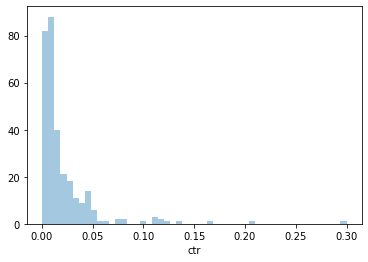

In [24]:
sns.distplot(ads_data_by_ad.ctr, kde=False)

In [86]:
# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [25]:
ads_data_by_ad = ads_data_by_ad.fillna(0)

In [26]:
ads_ids_bug = ads_data_by_ad.query('click == 0').ad_id

In [27]:
ads_data[ads_data.ad_id.isin(ads_ids_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,1988
1,ios,3075
0,android,4906


In [28]:
ads_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


In [118]:
# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [29]:
df_2019_04_04 =  ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)

In [30]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view

In [31]:
df_2019_04_04.ctr.quantile(q=0.95)

0.06624288425047421

In [101]:
df_2019_04_04[df_2019_04_04.view > 0].ctr.quantile(q=0.95)

0.06624288425047421

In [102]:
df_2019_04_04.ctr.max()

0.20905587668593448

In [ ]:
# Есть ли различия в CTR у объявлений с видео и без?

In [88]:
ad_vid_vs_novid = ads_data.groupby(['has_video', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index=['has_video'], columns='event', values='time') \
    .reset_index() \
    .fillna(0)

ad_vid_vs_novid['ctr'] = ad_vid_vs_novid.click / ad_vid_vs_novid.view

ad_vid_vs_novid

event,has_video,click,view,ctr
0,0,587437,2582113,0.227502
1,1,26,7138,0.003642


In [79]:
ad_video = ads_data.groupby(['ad_id', 'event', 'has_video'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index=['ad_id', 'has_video'], columns='event', values='time') \
    .reset_index() \
    .fillna(0)

In [80]:
ad_video['ctr'] = ad_video.click / ad_video.view

In [81]:
corret_df = ad_video[ad_video.view > 0]

In [82]:
no_video = corret_df[corret_df.has_video==0]
has_video = corret_df[corret_df.has_video==1]

C:\Users\psyrnev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\psyrnev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ctr', ylabel='Density'>

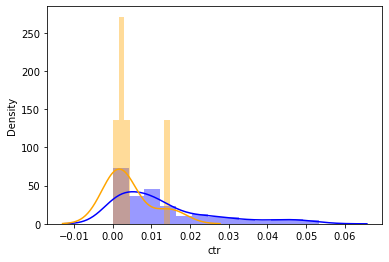

In [153]:
q = 0.06
sns.distplot(no_video[no_video.ctr <= q].ctr, color='blue')
sns.distplot(has_video[has_video.ctr <= q].ctr, color='orange')

In [99]:
no_video.ctr.median() 

0.009746588693957114

In [100]:
has_video.ctr.median()

0.001718213058419244

In [ ]:
# Для финансового отчета нужно рассчитать наш заработок по дням. 
# 
# В какой день мы заработали больше всего? В какой меньше? 
# Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, 
# и мы списываем деньги за каждый показ CPM объявления, если у 
# CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# 
# Какая платформа самая популярная для размещения рекламных объявлений? 
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?


In [146]:
x = pd.Series([1, 2, 3])

In [105]:
import numpy as np

In [106]:
ads_data[(ads_data.ad_cost_type == 'CPC') &  (ads_data.event == 'click')].ad_cost.sum()

84810.0

In [107]:
ads_data[(ads_data.ad_cost_type == 'CPM') &  (ads_data.event == 'view')].ad_cost.sum() / 1000

497090.6778000003

In [108]:
cpc_df = ads_data[(ads_data.ad_cost_type == 'CPC') &  (ads_data.event == 'click')]
cpm_df = ads_data[(ads_data.ad_cost_type == 'CPM') &  (ads_data.event == 'view')]

In [ ]:
# В какой день мы заработали больше всего? В какой меньше? 

In [128]:
cpc_by_day = cpc_df.groupby(by='date').ad_cost.sum().to_frame().rename(columns={'ad_cost':'cpc_sum'})

cpm_by_day = cpm_df.groupby(by='date').ad_cost.sum().div(1000).to_frame().rename(columns={'ad_cost':'cpm_sum'})

In [140]:
profit = pd.concat([cpc_by_day, cpm_by_day], axis=1).reset_index()

profit['total'] = profit.cpc_sum + profit.cpm_sum

profit = profit.sort_values('total')

min_profit = profit.total.min()
max_profit = profit.total.max()

profit.query('total == @max_profit or total == @min_profit')

,date,cpc_sum,cpm_sum,total
0,2019-04-01,7036.9,6122.812300,13159.712300
4,2019-04-05,4381.2,354178.548996,358559.748996


In [ ]:
# Какая платформа самая популярная для размещения рекламных объявлений? 

In [146]:
ads_data.groupby('platform') \
    .agg({'ad_id':'count'})

,ad_id
platform,
android,1588211
ios,953078
web,635425


In [ ]:
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?

In [154]:
ads_data.groupby('event').platform.value_counts(normalize=True)['view']

platform
android    0.500218
ios        0.299745
web        0.200038
Name: platform, dtype: float64

In [155]:
# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [159]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'min'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .query('click < view')

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09


In [161]:
ads_data[ads_data.ad_id == 16548].sort_values('time')

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
512690,16548,1554336083,click,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4133,2019-04-04 00:01:23
511482,16548,1554336278,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,3736,2019-04-04 00:04:38
511439,16548,1554336352,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,4968,2019-04-04 00:05:52
511438,16548,1554336352,view,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4206,2019-04-04 00:05:52
511437,16548,1554336352,view,2019-04-04,CPM,0,722,16523,web,196.6,53199,3898,2019-04-04 00:05:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056433,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,3613,2019-04-04 23:57:45
2056432,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,6044,2019-04-04 23:57:45
2056461,16548,1554422308,view,2019-04-05,CPM,0,722,16523,ios,196.6,53199,5831,2019-04-04 23:58:28
2056652,16548,1554422338,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,2837,2019-04-04 23:58:58
